# Web Scraping

In [73]:
import requests
from bs4 import BeautifulSoup
import json
import pathlib
import requests
from bs4 import BeautifulSoup
import random
import time
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [104]:
# URL da vítima
url = "https://www.gov.br/saude/pt-br/assuntos/noticias?b_start:int=1500"

# Cabeçalho para simular um navegador
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/117.0.0.0 Safari/537.36"
}

In [105]:
response = requests.get(url, headers=headers)
response
# <Response [200]> -> requisição foi bem-sucedida

<Response [200]>

In [106]:
soup = BeautifulSoup(response.text, "html.parser")

In [9]:
#soup

In [11]:
# Exibe o html como texto
#print(soup.get_text())

In [107]:
# Localizando o bloco com o id "textoMateria"
bloco_noticias = soup.find_all("article", class_="tileItem")
print(bloco_noticias)

[<article class="tileItem visualIEFloatFix tile-collective-nitf-content">
<div class="tileContent">
<div class="tileImage">
<a href="https://www.gov.br/saude/pt-br/assuntos/noticias/2024/abril/brasil-e-colombia-reafirmam-estrategias-conjuntas-para-a-cooperacao-em-saude">
<img alt="Parceria Fortalecida" class="tileImage" height="59" src="https://www.gov.br/saude/pt-br/assuntos/noticias/2024/abril/brasil-e-colombia-reafirmam-estrategias-conjuntas-para-a-cooperacao-em-saude/lula.png/@@images/7797c75a-faad-4a2d-b295-934330f575ec.png" width="128"/>
</a>
</div>
<span class="subtitle">PARCERIA FORTALECIDA</span>
<h2 class="tileHeadline">
<a class="summary url" href="https://www.gov.br/saude/pt-br/assuntos/noticias/2024/abril/brasil-e-colombia-reafirmam-estrategias-conjuntas-para-a-cooperacao-em-saude" title="collective.nitf.content">Brasil e Colômbia reafirmam estratégias conjuntas para a cooperação em saúde</a>
</h2>
<p class="tileBody">
<span class="description">Declaração conjunta entre os

In [108]:
links = [bloco.find("a", class_="summary url")["href"] for bloco in bloco_noticias]


In [109]:
links

['https://www.gov.br/saude/pt-br/assuntos/noticias/2024/abril/brasil-e-colombia-reafirmam-estrategias-conjuntas-para-a-cooperacao-em-saude',
 'https://www.gov.br/saude/pt-br/assuntos/noticias/2024/abril/moradores-do-complexo-da-mare-participam-de-oficina-de-inovacao-em-saude-digital',
 'https://www.gov.br/saude/pt-br/assuntos/noticias/2024/abril/ministerio-da-saude-e-google-anunciam-parceria-para-facilitar-acesso-a-informacoes-sobre-postos-de-vacinacao',
 'https://www.gov.br/saude/pt-br/assuntos/noticias/2024/abril/ministerio-da-saude-recomenda-ampliacao-do-publico-da-vacina-da-dengue',
 'https://www.gov.br/saude/pt-br/assuntos/noticias/2024/abril/coloquio-com-diversos-especialistas-debate-o-atual-cenario-da-dengue-no-pais',
 'https://www.gov.br/saude/pt-br/assuntos/noticias/2024/abril/saude-orienta-gestores-de-pernambuco-sobre-a-reconstrucao-da-saude-da-familia',
 'https://www.gov.br/saude/pt-br/assuntos/noticias/2024/abril/em-evento-com-especialistas-saude-reforca-tendencia-de-queda-

## Acessando as notícias

In [110]:
links = [link for link in links if "/assuntos/noticias" in link]

for link in links:
    print(link)

https://www.gov.br/saude/pt-br/assuntos/noticias/2024/abril/brasil-e-colombia-reafirmam-estrategias-conjuntas-para-a-cooperacao-em-saude
https://www.gov.br/saude/pt-br/assuntos/noticias/2024/abril/moradores-do-complexo-da-mare-participam-de-oficina-de-inovacao-em-saude-digital
https://www.gov.br/saude/pt-br/assuntos/noticias/2024/abril/ministerio-da-saude-e-google-anunciam-parceria-para-facilitar-acesso-a-informacoes-sobre-postos-de-vacinacao
https://www.gov.br/saude/pt-br/assuntos/noticias/2024/abril/ministerio-da-saude-recomenda-ampliacao-do-publico-da-vacina-da-dengue
https://www.gov.br/saude/pt-br/assuntos/noticias/2024/abril/coloquio-com-diversos-especialistas-debate-o-atual-cenario-da-dengue-no-pais
https://www.gov.br/saude/pt-br/assuntos/noticias/2024/abril/saude-orienta-gestores-de-pernambuco-sobre-a-reconstrucao-da-saude-da-familia
https://www.gov.br/saude/pt-br/assuntos/noticias/2024/abril/em-evento-com-especialistas-saude-reforca-tendencia-de-queda-nos-casos-de-dengue
https:

## Testando apenas uma notícia

In [111]:
full_url =  links[1]  # Construindo a URL completa
response = requests.get(full_url, headers=headers)

In [112]:
full_url

'https://www.gov.br/saude/pt-br/assuntos/noticias/2024/abril/moradores-do-complexo-da-mare-participam-de-oficina-de-inovacao-em-saude-digital'

In [113]:
soup = BeautifulSoup(response.text, "html.parser")

In [20]:
#print(soup.get_text(separator="\n").strip())

## Extraindo as covariáveis das notícias

In [114]:
# Extraindo o título
title = soup.find("meta", property="og:title")["content"]

# Extraindo a descrição
description = soup.find("meta", attrs={"name": "description"})["content"]

#Extraindo o subtítulo
subtitle = soup.find("p", property="rnews:alternativeHeadline").get_text()

# Extraindo a categoria
categoria = soup.find("div", id="form-widgets-categoria").get_text(strip=True)

#Extraindo o nome da pessoa que escreveu a matéria (vai aparecer de onde é: Ministério da Saúde)
nome_autora = soup.find("div", property="rnews:articleBody").find_all("p")[-1]

# Exibindo os resultados
print("Título:", title)
print("Sub-Título:", subtitle)
print("Descrição:", description)
print("Categoria:", categoria)
print("Autora:", nome_autora)


Título: Moradores do Complexo da Maré participam de oficina de inovação em saúde digital
Sub-Título: INCLUSÃO DIGITAL
Descrição: Dinâmica, promovida pelo Ministério da Saúde, busca desenvolver soluções digitais para problemas complexos de saúde, ouvindo a população e construindo soluções em políticas públicas em conjunto
Categoria: Saúde e Vigilância Sanitária
Autora: <p><em>Ministério da Saúde</em></p>


In [115]:
tags = []
try:
  div_tags = soup.find("div", class_="column").find("div", id="category")
  links_tags = div_tags.find_all("a", class_="link-category")
  tags = [link.get_text() for link in links_tags] if link else ""
except AttributeError:
  tags = None  # tive que usar try e except para o código funcionar quando leio várias notícias, pois na notícia 540 ele não tinha identificado tags


In [116]:
tags

['saúde digital', 'equidade', 'complexo da maré', 'rio de janeiro']

In [117]:
data_publicacao = soup.find("span", class_="documentPublished")
print(data_publicacao)
data_texto = data_publicacao.find("span", class_="value").text.strip()
data_formatada = data_texto.split(' ')[0]
print(data_formatada)

<span class="documentPublished">
<span>Publicado em</span>
<!-- TODO: Criar no arquivo de tradução uma máscara para a data aparecer no seguinte formato:
             PT_BR: 15/10/2019 às 14:01
             EN   : 10/15/2019 at 14:01
        -->
<span class="value">18/04/2024 11h55</span>
</span>
18/04/2024


In [118]:
#texto da matéria e autora da matéria
article_body = soup.find("div", property="rnews:articleBody")
paragraphs = article_body.find_all("p")
autora = paragraphs[-1].get_text(strip=True)
print(autora)

paragraphs.pop() # Exclui a última linha: Vanessa RodriguesMinistério da Saúde (correspondente a autora)
texto_materia = "\n\n".join(p.get_text(strip=True) for p in paragraphs)

print(texto_materia)

Ministério da Saúde
O Ministério da Saúde, por meio da Assessoria Especial de Territórios Vulneráveis, Favelas e Periferias do Gabinete do Ministério da Saúde, em parceria com aSecretaria de Informação e Saúde Digital (Seidigi), deu início, na segunda-feira (15), à Oficina de Transformação Digital na Comunidade Nova Holanda, no Complexo da Maré, no Rio de Janeiro. O objetivo da ação é construir, em parceria com a população, um plano de transformação digital em saúde no território. A iniciativa é articulada com a Fundação Oswaldo Cruz (Fiocruz), Redes Maré, Secretaria Municipal do Rio de Janeiro e tem apoio da Associação de Moradores da Vila João.

A oficina, com quatro dias de duração, tem como objetivo apoiar no desenvolvimento de soluções digitais para problemas complexos de saúde do território da Maré, focando em três eixos de atuação:saúde mentalda população, saúde da mulher (prevenção e planejamento), além de acesso às informações, tecnologias e serviços. Entre as atividades do ev

In [91]:
informacoes = {
        "url": full_url,
        "titulo": title,
        "descricao": description,
        "subtitulo": subtitle,
        "categoria": categoria,
        "autora": autora,
        "tags": tags,
        "data_publi": data_formatada,
        "texto": texto_materia
    }

In [92]:
informacoes

{'url': 'https://www.gov.br/saude/pt-br/assuntos/noticias/2024/dezembro/ministra-inaugura-novo-predio-da-faculdade-de-medicina-da-universidade-federal-fluminense',
 'titulo': 'Ministra inaugura novo prédio da Faculdade de Medicina da Universidade Federal Fluminense',
 'descricao': 'O evento reforça importância da parceria entre o Ministério da Saúde e instituições acadêmicas para o avanço da pesquisa científica e da saúde pública no Brasil',
 'subtitulo': 'EDUCAÇÃO NA SAÚDE',
 'categoria': 'Saúde e Vigilância Sanitária',
 'autora': 'Vanessa RodriguesMinistério da Saúde',
 'tags': ['trabalho e educação na saúde',
  'universidade',
  'avanço científico',
  'saúde pública'],
 'data_publi': '13/12/2024',
 'texto': 'Nesta sexta-feira (13), a Ministra da Saúde, Nísia Trindade, participou de cerimônia de inauguração da Universidade Federal Fluminense (UFF), em Niterói, no Rio de Janeiro. Durante o evento, foi destacada a relevância da parceria entre o Ministério da Saúde, Ministério da Educaç

In [49]:
numero_paginas = 15*140
links_noticias = []

for p in range(0, numero_paginas , 15):
    url = f"https://www.gov.br/saude/pt-br/assuntos/noticias?b_start:int={p}"
    response = requests.get(url, headers=headers)

    print(p, response)

    soup = BeautifulSoup(response.text, "html.parser")
    bloco_noticias = soup.find_all("article", class_="tileItem")

    links = [bloco.find("a", class_="summary url")["href"] for bloco in bloco_noticias]
    links = [link for link in links if "/assuntos/noticias" in link]

    links_noticias += links

    # Esperar alguns segundos antes de ir para a próxima página
    tempo_espera = random.uniform(0, 0.01)
    time.sleep(tempo_espera)

0 <Response [200]>
15 <Response [200]>
30 <Response [200]>
45 <Response [200]>
60 <Response [200]>
75 <Response [200]>
90 <Response [200]>
105 <Response [200]>
120 <Response [200]>
135 <Response [200]>
150 <Response [200]>
165 <Response [200]>
180 <Response [200]>
195 <Response [200]>
210 <Response [200]>
225 <Response [200]>
240 <Response [200]>
255 <Response [200]>
270 <Response [200]>
285 <Response [200]>
300 <Response [200]>
315 <Response [200]>
330 <Response [200]>
345 <Response [200]>
360 <Response [200]>
375 <Response [200]>
390 <Response [200]>
405 <Response [200]>
420 <Response [200]>
435 <Response [200]>
450 <Response [200]>
465 <Response [200]>
480 <Response [200]>
495 <Response [200]>
510 <Response [200]>
525 <Response [200]>
540 <Response [200]>
555 <Response [200]>
570 <Response [200]>
585 <Response [200]>
600 <Response [200]>
615 <Response [200]>
630 <Response [200]>
645 <Response [200]>
660 <Response [200]>
675 <Response [200]>
690 <Response [200]>
705 <Response [200]>


In [47]:
# links_noticias = links_noticias[1:] # a primeira

In [93]:
len(links_noticias)

2100

In [193]:
# Diretório onde os arquivos serão salvos
data_dir = pathlib.Path("data")
data_dir.mkdir(parents=True, exist_ok=True)  # Garante que o diretório será criado, se necessário

# se não encontrar nenhuma info assuma valor nulo
for i, link in enumerate(links_noticias):
    full_url = link
    response = requests.get(full_url, headers=headers)

    soup = BeautifulSoup(response.text, "html.parser")

    # Extração segura dos dados
    title = soup.find("meta", property="og:title")
    title = title["content"] if title else ""

    description = soup.find("meta", attrs={"name": "description"})
    description = description["content"] if description else ""

    subtitle = soup.find("p", property="rnews:alternativeHeadline")
    subtitle = subtitle.get_text() if subtitle else ""

    categoria = soup.find("div", id="form-widgets-categoria")
    categoria = categoria.get_text(strip=True) if categoria else ""

    tags = []
    try:
      div_tags = soup.find("div", class_="column").find("div", id="category")
      links_tags = div_tags.find_all("a", class_="link-category")
      tags = [link.get_text() for link in links_tags] if link else ""
    except AttributeError:
      tags = None

    data_publicacao = soup.find("span", class_="documentPublished")
    data_texto = data_publicacao.find("span", class_="value").text.strip()
    data_formatada = data_texto.split(' ')[0] if data_texto else ""

    materia = soup.find("div", property="rnews:articleBody")
    texto_materia = ""
    if materia: #se materia contém algum valor
        texto = materia.find_all("p")
        nome_autora = texto[-1].get_text(strip=True) if nome_autora else ""
        if texto:
            texto.pop()  # Remove o último parágrafo, se necessário
        texto_materia = "\n\n".join(p.get_text(strip=True) for p in paragraphs)

    # #texto da matéria e autora da matéria
    # article_body = soup.find("div", property="rnews:articleBody")
    # paragraphs = article_body.find_all("p")
    # nome_autora = paragraphs[-1].get_text(strip=True) if nome_autora else ""
    # paragraphs.pop() # Exclui a última linha
    # texto_materia = "\n\n".join(p.get_text(strip=True) for p in paragraphs) if texto_materia else ""

    # Estrutura do dicionário com informações extraídas
    informacoes = {
        "url": full_url,
        "titulo": title,
        "descricao": description,
        "subtitulo": subtitle,
        "categoria": categoria,
        "autora": nome_autora,
        "tags": tags,
        "data_publi": data_formatada,
        "texto": texto_materia
    }

    filename = f"noticia_{i}.json"
    file_path = data_dir / filename

    # Escreve as informações no arquivo JSON
    with file_path.open("w", encoding="utf-8") as f:
        json.dump(informacoes, f, ensure_ascii=False, indent=4)

    # Exibir o caminho no formato do Windows
    print(f"Arquivo salvo: {file_path.resolve()}")

    # Aguarda antes do próximo request para evitar sobrecarregar o servidor
    tempo_espera = random.uniform(0, 0.5)
    time.sleep(tempo_espera)


Arquivo salvo: /content/data/noticia_0.json
Arquivo salvo: /content/data/noticia_1.json
Arquivo salvo: /content/data/noticia_2.json
Arquivo salvo: /content/data/noticia_3.json
Arquivo salvo: /content/data/noticia_4.json
Arquivo salvo: /content/data/noticia_5.json
Arquivo salvo: /content/data/noticia_6.json
Arquivo salvo: /content/data/noticia_7.json
Arquivo salvo: /content/data/noticia_8.json
Arquivo salvo: /content/data/noticia_9.json
Arquivo salvo: /content/data/noticia_10.json
Arquivo salvo: /content/data/noticia_11.json
Arquivo salvo: /content/data/noticia_12.json
Arquivo salvo: /content/data/noticia_13.json
Arquivo salvo: /content/data/noticia_14.json
Arquivo salvo: /content/data/noticia_15.json
Arquivo salvo: /content/data/noticia_16.json
Arquivo salvo: /content/data/noticia_17.json
Arquivo salvo: /content/data/noticia_18.json
Arquivo salvo: /content/data/noticia_19.json
Arquivo salvo: /content/data/noticia_20.json
Arquivo salvo: /content/data/noticia_21.json
Arquivo salvo: /cont

IndexError: list index out of range

In [194]:
#Salvar arquivo para meu PC pessoal
import shutil
from google.colab import files

# Caminho da pasta que você quer baixar
folder_path = "/content/data"

# Caminho do arquivo zip que será criado
zip_path = "/content/data.zip"

# Compactar a pasta em um arquivo .zip
shutil.make_archive(folder_path, 'zip', folder_path)


files.download(zip_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Análise das notícias coletadas

In [202]:
import matplotlib.pyplot as plt
import pathlib
from datetime import datetime
import pandas as pd
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [203]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [204]:
data_dir

PosixPath('/content/drive/MyDrive/10º SEMESTRE/LABORATORIO/Atividade 4/Dataset')

In [206]:
# Caminho da pasta com os arquivos JSON
data_dir = pathlib.Path(r"/content/drive/MyDrive/10º SEMESTRE/LABORATORIO/Atividade 4/Dataset")

# Contador para as tags
tag_counter = {}

# Abrindo e processando os arquivos JSON
for json_file in data_dir.rglob("*.json"):
    with json_file.open("r", encoding="utf-8") as f:
        data = json.load(f)
        tags = data.get("tags", [])  # Obtém a lista de tags
        if tags:  # Verifica se tags não é None ou uma lista vazia
            for tag in tags:
                if tag in tag_counter:
                    tag_counter[tag] += 1
                else:
                    tag_counter[tag] = 1

In [207]:
print(tag_counter)

{'atenção primária': 273, 'mais médicos': 39, 'provimento': 3, 'inscrições': 2, 'ciência e tecnologia em saúde': 181, 'farmácia popular': 14, 'medicamentos': 22, 'assistência': 28, 'saúde do homem': 6, 'alcoolismo': 1, 'webinário': 25, 'vigilância em saúde e ambiente': 546, 'efeitos do álcool': 1, 'consumo de bebidas': 2, 'saúde mental': 24, 'secretaria executiva': 200, 'senado': 1, 'assuntos sociais': 1, 'comissão': 1, 'saúde da população negra': 5, 'estratégias interministeriais': 1, 'ações afirmativas': 1, 'racismo': 6, 'estratégia antirracista': 3, 'opas': 5, 'população em situação de rua': 5, 'projetos sociais': 1, 'direitos humanos': 4, 'trabalho e educação na saúde': 116, 'equidade': 41, 'movimentos sociais': 8, 'assistência em saúde': 16, 'investimento': 14, 'rio grande do sul': 171, 'assistência financeira complementar': 11, 'piso da enfermagem': 18, 'caravana': 3, 'atenção especializada à saúde': 313, 'mais acesso a especialistas': 32, 'redução das filas': 2, 'poliomielite': 

## Tags mais frequentes das notícias do Ministério da Saúde

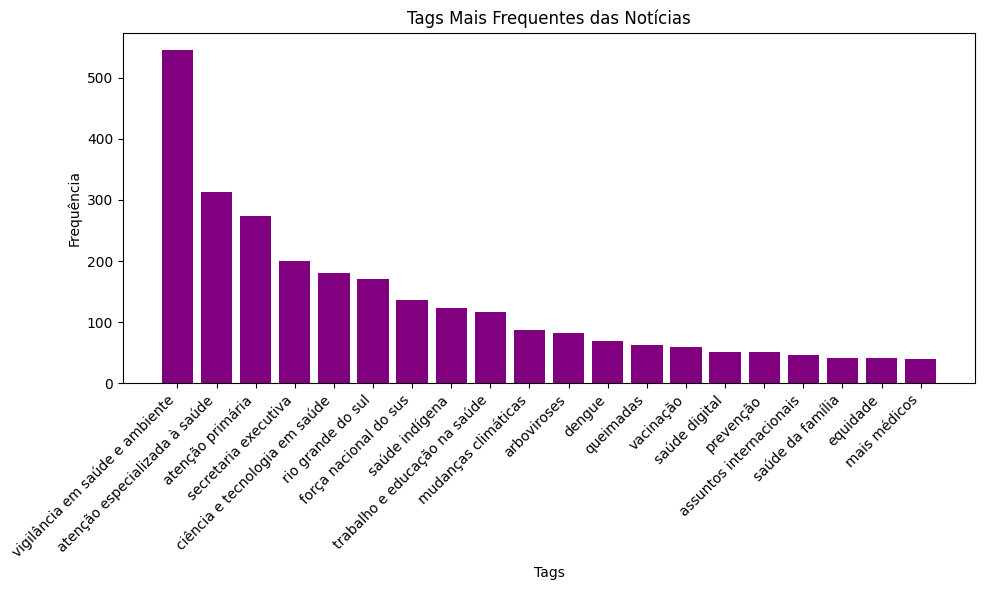

In [208]:
# Criando o dicionário com as tags e suas contagens
tag_count_dict = dict(sorted(tag_counter.items(), key=lambda x: x[1], reverse=True))

# Selecionando as tags mais comuns
top_tags = list(tag_count_dict.items())[:20]  # Top 20 tags mais frequentes

# Separando os dados para o gráfico
labels, values = zip(*top_tags)

# Criando o gráfico
plt.figure(figsize=(10, 6))
plt.bar(labels, values,color='purple')
plt.xlabel("Tags")
plt.ylabel("Frequência")
plt.title("Tags Mais Frequentes das Notícias")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

## Número de notícias por mês coletadas

In [209]:
dates = []

# Lendo os arquivos JSON
for json_file in data_dir.rglob("*.json"):
    with open(json_file, "r", encoding="utf-8") as f:
        entry = json.load(f)
        date_str = entry.get("data_publi", "")  # Data no formato "dd/mm/yyyy"
        if date_str:
            try:
                # Converter data no formato "dd/mm/yyyy" para datetime
                date = datetime.strptime(date_str, "%d/%m/%Y")
                month = date.strftime("%Y-%m")  # Extrair ano e mês (ex: 2024-11)
                dates.append(month)
            except ValueError:
                print(f"Data inválida no arquivo: {json_file} ({date_str})")


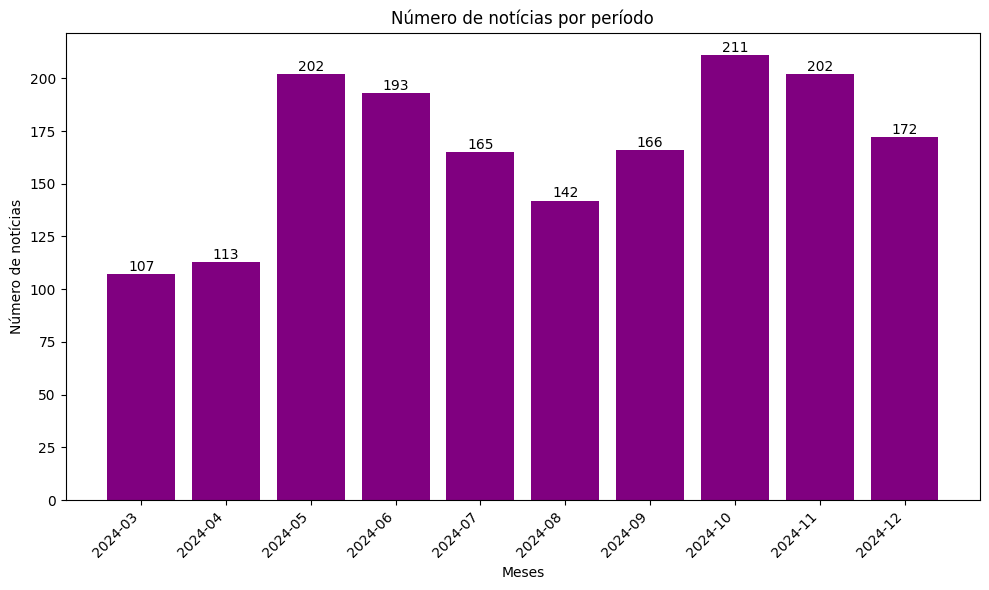

In [210]:
meses_counts = pd.Series(dates).value_counts().sort_index()

# Criando o gráfico
plt.figure(figsize=(10, 6))
ax = plt.bar(meses_counts.index, meses_counts.values, color='purple')

#rótulos
for i, count in enumerate(meses_counts.values):
    plt.text(i, count + 0.1, str(count), ha='center', va='bottom', fontsize=10)

plt.xlabel("Meses")
plt.ylabel("Número de notícias")
plt.title("Número de notícias por período")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [211]:
data # ver a data

{'url': 'https://www.gov.br/saude/pt-br/assuntos/noticias/2024/julho/brasil-precisa-retomar-as-altas-coberturas-vacinais-para-que-criancas-e-jovens-nao-sofram-de-doencas-que-podem-ser-evitadas-diz-ministra',
 'titulo': '“Brasil precisa retomar as altas coberturas vacinais para que crianças e jovens não sofram de doenças que podem ser evitadas”, diz ministra',
 'descricao': 'Durante a participação no programa “Bom Dia, Ministra”, Nísia Trindade relatou os esforços do Governo Federal que resultaram no aumento de 13 das 16 principais vacinas',
 'subtitulo': 'ENTREVISTA',
 'categoria': 'Saúde e Vigilância Sanitária',
 'autora': 'Nadja Alves dos ReisMinistério da Saúde',
 'tags': ['vigilância em saúde e ambiente',
  'saúde digital',
  'vacinação',
  'gestão hospitalar'],
 'data_publi': '17/07/2024',
 'texto': 'O Ministério da Saúde, por meio da Assessoria Especial de Territórios Vulneráveis, Favelas e Periferias do Gabinete do Ministério da Saúde, em parceria com aSecretaria de Informação e

## Quantidade de Categorias e Autoras Mais frequentes

In [240]:
categoria_counter = Counter()
autoras_counter = Counter()


for json_file in data_dir.rglob("*.json"):
    with json_file.open("r", encoding="utf-8") as f:
        data = json.load(f)

        # Contar categorias
        categoria = data.get("categoria", None)  #
        if categoria:  # Verifica se a categoria não é None
            categoria_counter[categoria] += 1  # Incrementa a contagem da categoria

        # Contar autoras
        autora = data.get("autora", "").strip()  # Obtém o nome da autora (ou "" se não existir)
        if autora:
            autoras_counter[autora] += 1  # aumenta a contagem da autora

# resultados para categorias
print(f"Total de categorias únicas: {len(categoria_counter)}")
print(f"Categorias mais frequentes:\n{categoria_counter.most_common(10)}")

# resultados para autoras
print(f"Total de autoras únicas: {len(autoras_counter)}")
print(f"Top 10 Autoras mais frequentes:\n{autoras_counter.most_common(10)}")


Total de categorias únicas: 1
Categorias mais frequentes:
[('Saúde e Vigilância Sanitária', 1673)]
Total de autoras únicas: 224
Top 10 Autoras mais frequentes:
[('Ministério da Saúde', 442), ('Edjalma BorgesMinistério da Saúde', 135), ('Otávio AugustoMinistério da Saúde', 133), ('Vanessa RodriguesMinistério da Saúde', 95), ('Ana FreireMinistério da Saúde', 83), ('Nathan VictorMinistério da Saúde', 79), ('João MoraesMinistério da Saúde', 58), ('Nadja Alves dos ReisMinistério da Saúde', 38), ('Leidiane SouzaMinistério da Saúde', 26), ('Tania MelloMinistério da Saúde', 24)]


##Frequência das Tags por data

In [215]:
tags_data = []

for json_file in data_dir.rglob("*.json"):
    with json_file.open("r", encoding="utf-8") as f:
        data = json.load(f)
        tags = data.get("tags", [])
        date_str = data.get("data_publi", "")  # Data no formato "dd/mm/yyyy"
        if date_str:
            try:
                # Converter data no formato "dd/mm/yyyy" para datetime
                date = datetime.strptime(date_str, "%d/%m/%Y")
                month = date.strftime("%Y-%m")  # Extrair ano e mês (ex: 2024-12)
                if tags:
                  for tag in tags:
                      tags_data.append({"month": month, "tag": tag})
            except ValueError:
                print(f"Data inválida no arquivo {json_file}: {date_str}")

df = pd.DataFrame(tags_data)
freq_datas_tags = df.groupby(["month", "tag"]).size().reset_index(name="frequency")
freq_datas_tags = freq_datas_tags.sort_values(by=["month", "frequency"], ascending=[True, False])

print(freq_datas_tags)


        month                             tag  frequency
204   2024-03  vigilância em saúde e ambiente         37
176   2024-03            secretaria executiva         21
37    2024-03   ciência e tecnologia em saúde         15
58    2024-03                          dengue         11
21    2024-03                atenção primária          9
...       ...                             ...        ...
2702  2024-12          vigilância nutricional          1
2703  2024-12                         vigitel          1
2704  2024-12             violência de gênero          1
2705  2024-12                vivências no sus          1
2708  2024-12                           ética          1

[2709 rows x 3 columns]


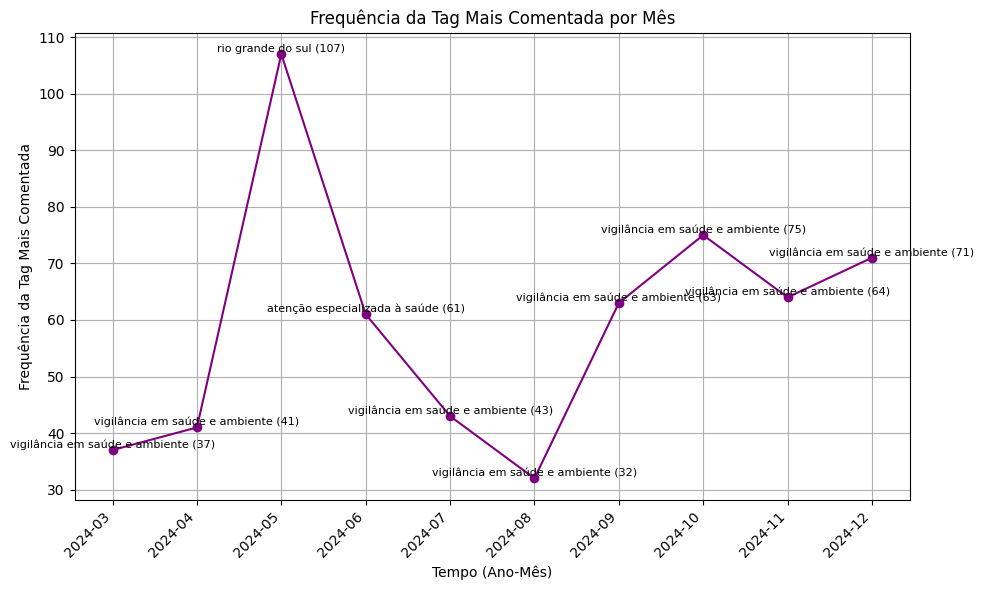

In [216]:
# Tags mais frequentes por Data
mais_freq_data = freq_datas_tags.loc[freq_datas_tags.groupby("month")["frequency"].idxmax()]

# 2024-03	vigilância em saúde e ambiente	37
# 419	2024-04	vigilância em saúde e ambiente	41
# 623	2024-05	rio grande do sul	107
# 695	2024-06	atenção especializada à saúde	61
# 1229	2024-07	vigilância em saúde e ambiente	43
# 1492	2024-08	vigilância em saúde e ambiente	32
# 1748	2024-09	vigilância em saúde e ambiente	63
# 2056	2024-10	vigilância em saúde e ambiente	75
# 2403	2024-11	vigilância em saúde e ambiente	64
# 2671	2024-12	vigilância em saúde e ambiente	68

plt.figure(figsize=(10, 6))
plt.plot(mais_freq_data["month"], mais_freq_data["frequency"], marker="o", linestyle="-", color="purple")

# Adicionando os rótulos para cada ponto (tag e sua frequência)
for i, count in enumerate(mais_freq_data["frequency"]):
    plt.text(i, count, f"{mais_freq_data['tag'].iloc[i]} ({count})", fontsize=8, ha="center", va="bottom")

# Rótulos do gráfico
plt.xlabel("Tempo (Ano-Mês)")
plt.ylabel("Frequência da Tag Mais Comentada")
plt.title("Frequência da Tag Mais Comentada por Mês")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.grid(True)
plt.show()

## Atenção para Maio de 2024: tragédia do Rio Grande do Sul

## Analisando Similariedade Textual entre Subtítulos

In [221]:
subtitulo = []

# Processar os arquivos JSON
for json_file in data_dir.rglob("*.json"):
    with json_file.open("r", encoding="utf-8") as f:
        data = json.load(f)
        subtitulo_text = data.get("subtitulo", "").strip()  # Garantir que a chave seja lida corretamente
        if subtitulo_text:  # Adicionar subtítulo apenas se não estiver vazio
            subtitulo.append(subtitulo_text)

# Remover duplicatas
subtitulo_sem_dupli = list(set(subtitulo))
print(f"Total de subtítulos encontrados únicos: {len(subtitulo_sem_dupli)}")

# Vetorização com TF-IDF
vectorizer = TfidfVectorizer()
tfidf_matriz = vectorizer.fit_transform(subtitulo_sem_dupli)

# Similaridade do cosseno
similaridade_matriz = cosine_similarity(tfidf_matriz)

# Criar DataFrame de similaridade
base_sim = pd.DataFrame(similaridade_matriz, index=subtitulo_sem_dupli, columns=subtitulo_sem_dupli)

subtitulos_similiares = []

for i, category in enumerate(base_sim.index):
    similaridades = base_sim.iloc[i].sort_values(ascending=False)

    # Verificar se há subtítulos além da própria
    if len(similaridades) > 1:
        # Ignorar a própria categoria (índice 0) e pegar o segundo mais similar
        similar_categories = similaridades.index[1]
        scores = similaridades.iloc[1]
        subtitulos_similiares.append({
            "subtitulo": category,
            "mais_similar": similar_categories,
            "pontuacao": scores
        })
        #print(f"'{category}' é mais semelhante a '{similar_categories}' de pontuação {scores:.2f}")
    else:
        print("Não há subtítulos semelhantes além do próprio.")

# Criando um DataFrame com as similaridades
df_similares = pd.DataFrame(subtitulos_similiares)
df_similares = df_similares.sort_values(by="pontuacao", ascending=False).head(20)

Total de subtítulos encontrados únicos: 698


In [222]:
df_similares

,subtitulo,mais_similar,pontuacao
148,CULTURA E SAÚDE,SAÚDE + CULTURA,1.0
134,­­PARTICIPAÇÃO SOCIAL,PARTICIPAÇÃO SOCIAL,1.0
493,SAÚDE + CULTURA,SAÚDE + CULTURA,1.0
42,PARTICIPAÇÃO SOCIAL,PARTICIPAÇÃO SOCIAL,1.0
178,JULHO AMARELO,JULHO AMARELO,1.0
359,SAÚDE & CULTURA,SAÚDE + CULTURA,1.0
479,Julho Amarelo,JULHO AMARELO,1.0
504,DIA D CONTRA DENGUE,DIA D CONTRA DENGUE,1.0
469,DIA D CONTRA A DENGUE,DIA D CONTRA DENGUE,1.0
63,­­PREVENÇÃO,­­PREVENÇÃO,1.0


from matplotlib import pyplot as plt
df_similares['pontuacao'].plot(kind='hist', bins=20, title='pontuacao')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_similares['pontuacao'].plot(kind='line', figsize=(8, 4), title='pontuacao')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['pontuacao'].plot(kind='hist', bins=20, title='pontuacao')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='index', y='pontuacao', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_4['pontuacao'].plot(kind='line', figsize=(8, 4), title='pontuacao')
plt.gca().spines[['top', 'right']].set_visible(False)

                   subtitulo                 mais_similar  pontuacao
233                 NOVO PAC               NOVO PAC SAÚDE   0.938633
537           NOVO PAC SAÚDE                     NOVO PAC   0.938633
684          SAÚDE EM DEBATE                    EM DEBATE   0.921165
61                 EM DEBATE              SAÚDE EM DEBATE   0.921165
0      SAÚDE & SOLIDARIEDADE                SOLIDARIEDADE   0.903453
550            SOLIDARIEDADE        SAÚDE & SOLIDARIEDADE   0.903453
361               INFORMAÇÃO           SAÚDE & INFORMAÇÃO   0.888919
78                   CULTURA              CULTURA E SAÚDE   0.888919
114       SAÚDE & INFORMAÇÃO                   INFORMAÇÃO   0.888919
33           DE VOLTA À CASA           DE VOLTA PARA CASA   0.885286
681       DE VOLTA PARA CASA              DE VOLTA À CASA   0.885286
142                AMPLIAÇÃO              AMPLIAÇÃO SAÚDE   0.882980
696  SAÚDE & DESENVOLVIMENTO              DESENVOLVIMENTO   0.882980
481          DESENVOLVIMENTO      

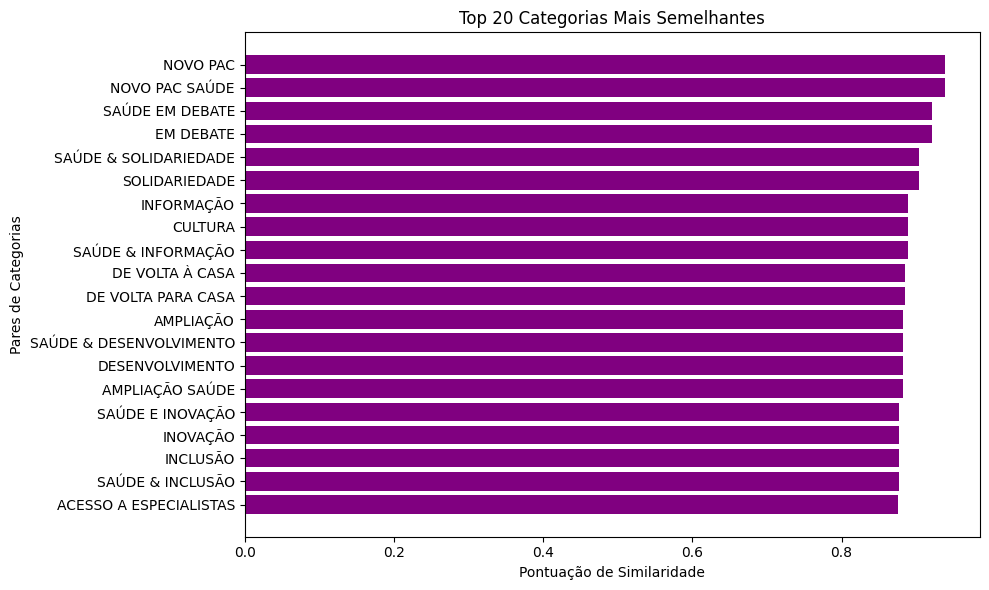

In [220]:
top20_subtitulos_similiares = df_similares[df_similares["pontuacao"] < 0.99]
top20_subtitulos_similiares = top20_subtitulos_similiares.sort_values(by="pontuacao", ascending=False).head(20)
print(top20_subtitulos_similiares)

similar_categories = top20_subtitulos_similiares["subtitulo"]
scores = top20_subtitulos_similiares["pontuacao"]

# Criando o gráfico
plt.figure(figsize=(10, 6))
plt.barh(similar_categories, scores, color='purple')
plt.xlabel("Pontuação de Similaridade")
plt.ylabel("Pares de Categorias")
plt.title("Top 20 Categorias Mais Semelhantes")
plt.gca().invert_yaxis()
plt.tight_layout()

# Exibindo o gráfico
plt.show()


In [223]:
df_similares

,subtitulo,mais_similar,pontuacao
148,CULTURA E SAÚDE,SAÚDE + CULTURA,1.0
134,­­PARTICIPAÇÃO SOCIAL,PARTICIPAÇÃO SOCIAL,1.0
493,SAÚDE + CULTURA,SAÚDE + CULTURA,1.0
42,PARTICIPAÇÃO SOCIAL,PARTICIPAÇÃO SOCIAL,1.0
178,JULHO AMARELO,JULHO AMARELO,1.0
359,SAÚDE & CULTURA,SAÚDE + CULTURA,1.0
479,Julho Amarelo,JULHO AMARELO,1.0
504,DIA D CONTRA DENGUE,DIA D CONTRA DENGUE,1.0
469,DIA D CONTRA A DENGUE,DIA D CONTRA DENGUE,1.0
63,­­PREVENÇÃO,­­PREVENÇÃO,1.0


## Subtítulos mais semelhantes com base em Tags

In [179]:
subtitulos_list = []
tags_list = []

# Processar os arquivos JSON
for json_file in data_dir.rglob("*.json"):
    with json_file.open("r", encoding="utf-8") as f:
        data = json.load(f)
        subtitulo = data.get("subtitulo", "").strip()
        tags = " ".join(data.get("tags", [])).strip()
        if subtitulo and tags:  # Adicionar apenas se ambos subtítulo e tags não estiverem vazios
            subtitulos_list.append(subtitulo)
            tags_list.append(tags)

# Vetorização com TF-IDF usando as tags como contexto
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(tags_list)  # Vetorizar com as tags

# Similaridade do cosseno
similarity_matrix = cosine_similarity(tfidf_matrix)

# Criar DataFrame de similaridade
dataset_sim = pd.DataFrame(similarity_matrix, index=subtitulos_list, columns=subtitulos_list)

# Diagnóstico: Exibir a matriz de similaridade
print("\nMatriz de similaridade entre subtítulos baseada nas tags:")
print(dataset_sim)

# Identificar os subtítulos mais semelhantes com base nas tags
print("\nSubtítulos mais semelhantes com base nas tags:")
pares_sim = []  # Lista para armazenar os pares de subtítulos semelhantes

for i, subtitulo in enumerate(dataset_sim.index):
    similarities = dataset_sim.iloc[i].sort_values(ascending=False)

    # Verificar se há subtítulos além do próprio
    if len(similarities) > 1:
        most_similar = similarities.index[1]  # Ignorar o próprio subtítulo
        similarity_score = similarities.iloc[1]
        pares_sim.append((subtitulo, most_similar, similarity_score))
        print(f"'{subtitulo}' é mais semelhante a '{most_similar}' com pontuação {similarity_score:.2f}")
    else:
        print(f"'{subtitulo}' não tem outros subtítulos com os quais comparar.")

# Criar DataFrame com os pares semelhantes
tab = pd.DataFrame(pares_sim, columns=["Subtítulo", "Subtítulo Mais Semelhante", "Pontuação de Similaridade"])

# Exportar para CSV
tab.to_csv("subtitulos_semelhantes_por_tags.csv", index=False)
print("\nTabela de pares semelhantes exportada para 'subtitulos_semelhantes_por_tags.csv'.")



Matriz de similaridade entre subtítulos baseada nas tags:
                     ARBOVIROSES  MISSÃO SECA EXTREMA  CHAMADA PÚBLICA  \
ARBOVIROSES             1.000000             0.119697         0.008217   
MISSÃO SECA EXTREMA     0.119697             1.000000         0.009198   
CHAMADA PÚBLICA         0.008217             0.009198         1.000000   
FOCO NO PACIENTE        0.009414             0.010537         0.053508   
MISSÃO SECA EXTREMA     0.119697             1.000000         0.009198   
...                          ...                  ...              ...   
CONSCIENTIZAÇÃO         0.046407             0.008686         0.025056   
QUEIMADAS               0.123600             0.599681         0.017279   
SAÚDE OCULAR            0.016603             0.068414         0.033227   
MALÁRIA                 0.312715             0.173430         0.006948   
SAÚDE & AMBIENTE        0.107994             0.563993         0.008298   

                     FOCO NO PACIENTE  MISSÃO SECA E

In [224]:
tab

,Subtítulo,Subtítulo Mais Semelhante,Pontuação de Similaridade,Subtítulo Ordenado
0,ARBOVIROSES,ARBOVIROSES,0.865069,"(ARBOVIROSES, ARBOVIROSES)"
1,MISSÃO SECA EXTREMA,QUEIMADAS,1.000000,"(MISSÃO SECA EXTREMA, QUEIMADAS)"
2,CHAMADA PÚBLICA,SAÚDE MENTAL,0.771215,"(CHAMADA PÚBLICA, SAÚDE MENTAL)"
3,FOCO NO PACIENTE,RIO GRANDE DO SUL,0.342737,"(FOCO NO PACIENTE, RIO GRANDE DO SUL)"
4,MISSÃO SECA EXTREMA,QUEIMADAS,1.000000,"(MISSÃO SECA EXTREMA, QUEIMADAS)"
...,...,...,...,...
1645,CONSCIENTIZAÇÃO,CONSCIENTIZAÇÃO,1.000000,"(CONSCIENTIZAÇÃO, CONSCIENTIZAÇÃO)"
1646,QUEIMADAS,QUEIMADAS,0.917478,"(QUEIMADAS, QUEIMADAS)"
1647,SAÚDE OCULAR,CUIDADOS,0.343381,"(CUIDADOS, SAÚDE OCULAR)"
1648,MALÁRIA,ESTRATÉGIA DE VIGILÂNCIA,0.480306,"(ESTRATÉGIA DE VIGILÂNCIA, MALÁRIA)"


## Similaridade com IMUNIZAÇÃO

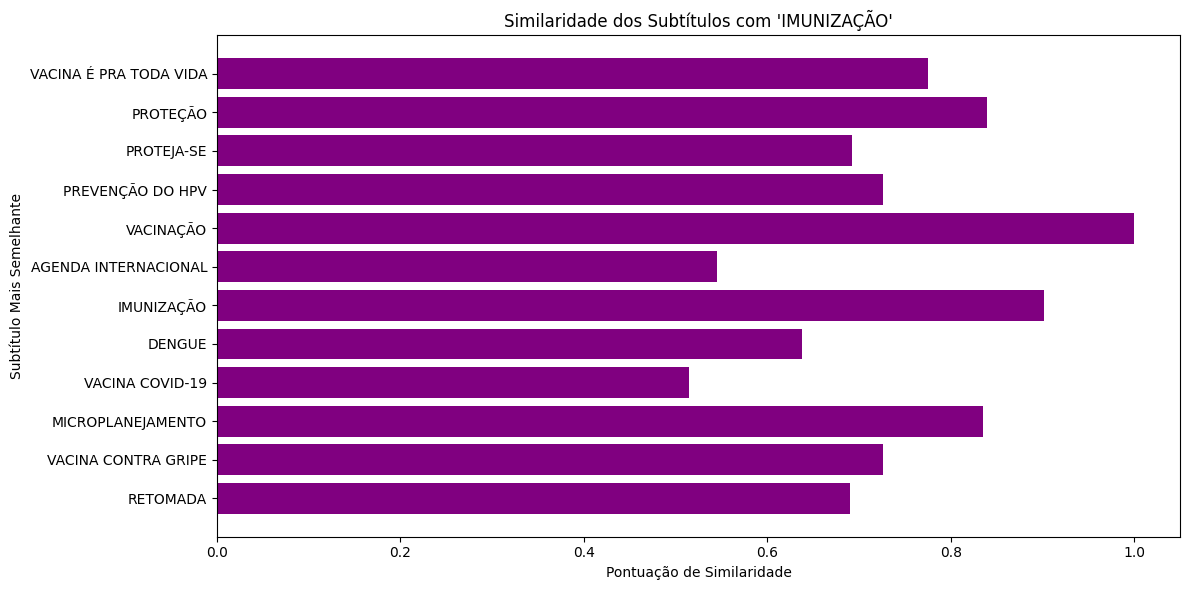

In [225]:
filtered_df = tab[tab['Subtítulo']=='IMUNIZAÇÃO']

# Plotar gráfico de barras
plt.figure(figsize=(12, 6))
plt.barh(filtered_df["Subtítulo Mais Semelhante"], filtered_df["Pontuação de Similaridade"], color="purple")
plt.xlabel("Pontuação de Similaridade")
plt.ylabel("Subtítulo Mais Semelhante")
plt.title("Similaridade dos Subtítulos com 'IMUNIZAÇÃO'")
plt.gca().invert_yaxis()  # Inverter a ordem dos subtítulos no eixo y para melhor visualização
plt.tight_layout()
plt.show()

## Similaridade com RIO GRANDE DO SUL

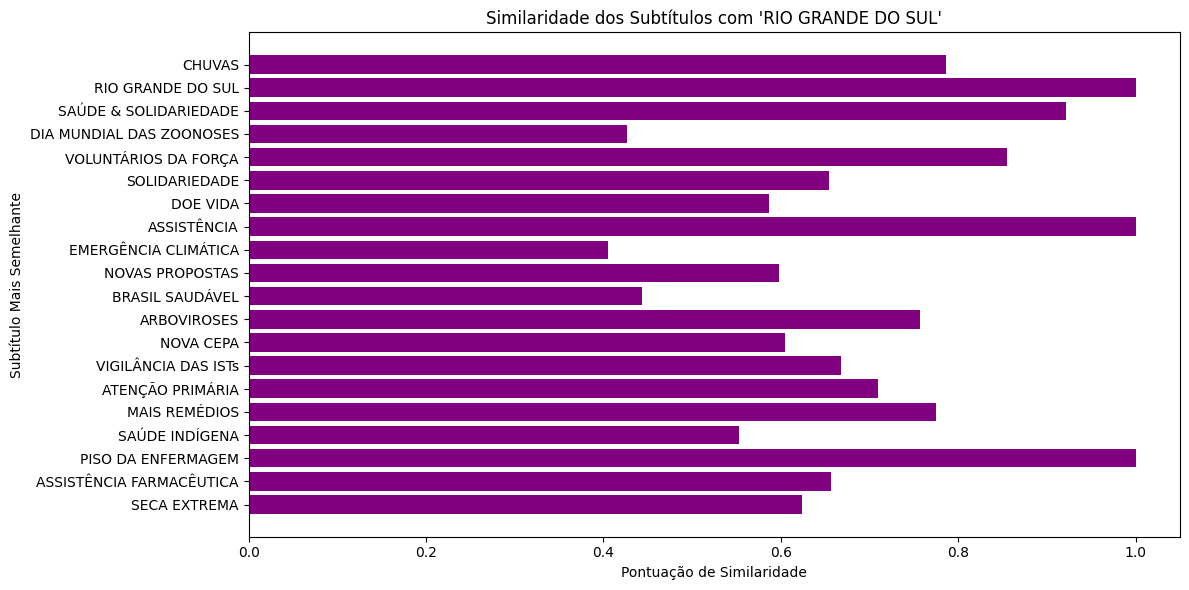

In [241]:
filtered_df = tab[tab['Subtítulo']=='RIO GRANDE DO SUL']

# Plotar gráfico de barras
plt.figure(figsize=(12, 6))
plt.barh(filtered_df["Subtítulo Mais Semelhante"], filtered_df["Pontuação de Similaridade"], color="purple")
plt.xlabel("Pontuação de Similaridade")
plt.ylabel("Subtítulo Mais Semelhante")
plt.title("Similaridade dos Subtítulos com 'RIO GRANDE DO SUL'")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

## Similaridade com MALÁRIAS

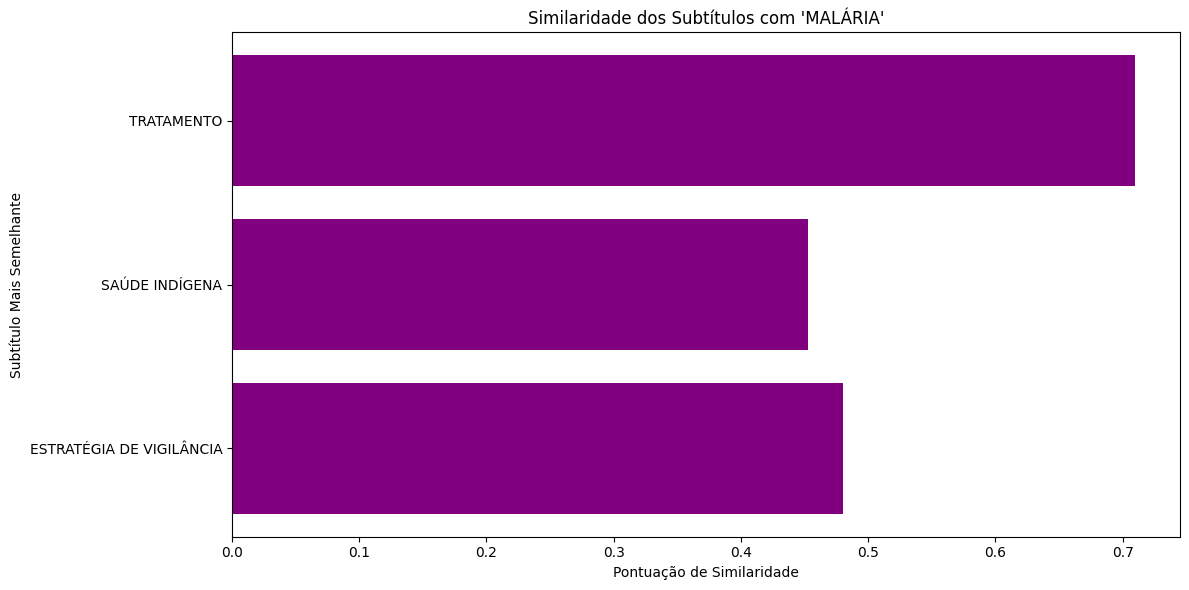

In [242]:
filtered_df = tab[tab['Subtítulo']=='MALÁRIA']

# Plotar gráfico de barras
plt.figure(figsize=(12, 6))
plt.barh(filtered_df["Subtítulo Mais Semelhante"], filtered_df["Pontuação de Similaridade"], color="purple")
plt.xlabel("Pontuação de Similaridade")
plt.ylabel("Subtítulo Mais Semelhante")
plt.title("Similaridade dos Subtítulos com 'MALÁRIA'")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

## Similaridade com SAÚDE MENTAL

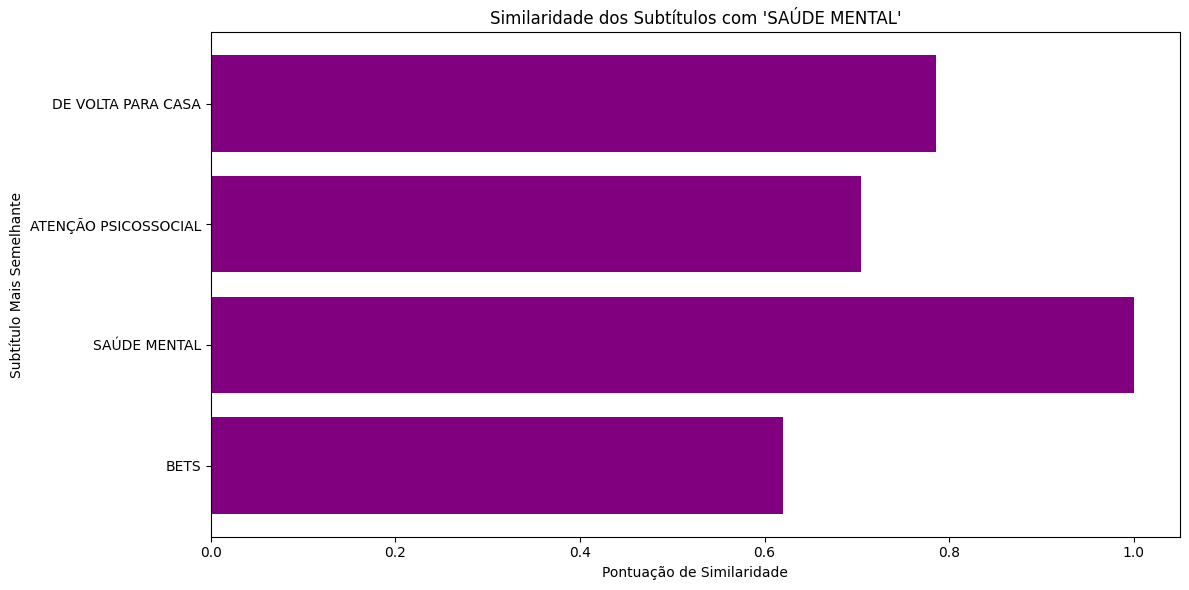

In [245]:
filtered_df = tab[tab['Subtítulo']=='SAÚDE MENTAL']

# Plotar gráfico de barras
plt.figure(figsize=(12, 6))
plt.barh(filtered_df["Subtítulo Mais Semelhante"], filtered_df["Pontuação de Similaridade"], color="purple")
plt.xlabel("Pontuação de Similaridade")
plt.ylabel("Subtítulo Mais Semelhante")
plt.title("Similaridade dos Subtítulos com 'SAÚDE MENTAL'")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

## Palavras mais frequentes no TEXTO sem considerar de tamanho 2

In [247]:
texts = []
for json_file in data_dir.rglob("*.json"):
    with json_file.open("r", encoding="utf-8") as f:
        data = json.load(f)
        texto = data.get("texto", "").strip()  # Obter o texto
        if texto:
            texts.append(texto)


vectorizer = CountVectorizer(stop_words='english', lowercase=True)
X = vectorizer.fit_transform(texts)
word_counts = X.sum(axis=0).A1


word_freq = pd.DataFrame(zip(vectorizer.get_feature_names_out(), word_counts), columns=["Word", "Frequency"])
word_freq = word_freq[word_freq["Word"].apply(lambda x: len(x) > 2)]
word_freq = word_freq.sort_values(by="Frequency", ascending=False)

print(word_freq.head(40))


              Word  Frequency
242          saúde      26768
74         digital      20076
156           maré      16730
39             com      15057
191           para      15057
232            que      10038
40            como       8365
277            uma       6692
47     comunidades       6692
258            sus       6692
271  transformação       6692
166      moradores       6692
178            não       5019
254          sobre       5019
259            são       5019
244     secretaria       5019
46      comunidade       5019
43        complexo       5019
240            rio       5019
266    territórios       5019
182        oficina       5019
207      população       5019
111        favelas       5019
163     ministério       5019
146         juntos       3346
209            por       3346
145           joão       3346
170      municipal       3346
203          plano       3346
249        seidigi       3346
129          geral       3346
192       parceria       3346
127       

## Extrair nomes próprios dos textos

Inspiração: https://github.com/rmaacario/Processamento-de-Linguagem-Natural-em-Portugues-com-Redes-Neurais-I/blob/main/01_Spacy.ipynb

In [235]:
#%pip install spacy -U

In [236]:
#!python -m spacy download pt_core_news_sm

In [229]:
import spacy
import pt_core_news_sm
spacyPT = pt_core_news_sm.load()

In [230]:
spacy.__version__

'3.8.3'

In [248]:
len(texts)

1673

In [238]:
# Supondo que 'texts' seja uma lista de textos
nomes_proprios = set()

# Processando cada texto individualmente
for texto in texts:
    # Processando o texto com o modelo SpaCy
    doc = spacyPT(texto)

    # Identificando entidades e filtrando os nomes próprios
    for entidade in doc.ents:
        if entidade.label_ == "PER":  # Verifica se a entidade é uma pessoa
            nomes_proprios.add(entidade.text)

print(nomes_proprios)


{'SUS Digital', 'Valcler', 'Valcler Fernandes', 'Nísia Trindade', 'Ana Estela Haddad', 'Redes Maré', 'Fernanda Adães'}
